**Load Dataset**

In [92]:
import pandas as pd
import random

# List of public holidays
public_holidays = {
    # 2023 Holidays
    '2023-01-01': 'New Year’s Day',
    '2023-02-20': 'Family Day',  # Example: South Africa
    '2023-03-21': 'Human Rights Day',  # Example: South Africa
    '2023-04-07': 'Good Friday',
    '2023-04-10': 'Easter Monday',
    '2023-04-27': 'Freedom Day',  # Example: South Africa
    '2023-05-01': 'Workers\' Day',
    '2023-06-16': 'Youth Day',  # Example: South Africa
    '2023-08-09': 'Women’s Day',  # Example: South Africa
    '2023-09-24': 'Heritage Day',  # Example: South Africa
    '2023-12-25': 'Christmas',
    '2023-12-26': 'Boxing Day',

    # 2024 Holidays
    '2024-01-01': 'New Year’s Day',
    '2024-02-19': 'Family Day',  # Example: South Africa
    '2024-03-21': 'Human Rights Day',  # Example: South Africa
    '2024-03-29': 'Good Friday',
    '2024-04-01': 'Easter Monday',
    '2024-04-27': 'Freedom Day',  # Example: South Africa
    '2024-05-01': 'Workers\' Day',
    '2024-06-16': 'Youth Day',  # Example: South Africa
    '2024-08-09': 'Women’s Day',  # Example: South Africa
    '2024-09-24': 'Heritage Day',  # Example: South Africa
    '2024-12-25': 'Christmas',
    '2024-12-26': 'Boxing Day',
    '2024-12-31': 'New Year’s Eve',
}

def generate_data(start_date, end_date):
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    data = []

    products = ['Milk', 'Bread', 'Eggs', 'Butter', 'Sugar', 'Rice', 'Tea', 'Coffee']
    seasons = ['Winter', 'Spring', 'Summer', 'Fall']
    event_types = ['Community Fest', 'Festival']
    weather_conditions = ['Cold', 'Mild', 'Warm']

    for date in dates:
        for product in products:  # Record data for all products each day
            day_of_week = date.strftime('%A')
            quantity_sold = random.randint(10, 100)  # Number of units sold
            price = random.uniform(1.0, 10.0)  # Price per unit (random float between 1.0 and 10.0)
            sales = quantity_sold * price  # Total sales for the product
            inventory_level = random.randint(50, 150)  # Inventory level for the product
            season = seasons[(date.month - 1) // 3]  # Simplified season determination
            local_event = random.choice([True, False])  # Randomly determine if a local event happened
            event_type = random.choice(event_types) if local_event else 'N/A'  # Assign proper event type if event occurs
            sales_category = 'Essentials' if product in ['Milk', 'Bread', 'Eggs', 'Butter'] else 'Non-Essentials'
            sales_promotion = random.choice([True, False])
            weather = random.choice(weather_conditions)
            holiday = public_holidays.get(date.strftime('%Y-%m-%d'), 'No Holiday')

            data.append([date, day_of_week, quantity_sold, sales, inventory_level, product, season, local_event, event_type,
                sales_category, sales_promotion, weather, holiday
            ])

    df = pd.DataFrame(data, columns=[
        'Date', 'Day of Week', 'Quantity_Sold', 'Sales', 'Inventory_Level', 'Product', 'Season',
        'Local_Event', 'Event_Type', 'Sales_Category', 'Sales_Promotion', 'Weather', 'Holiday'
    ])

    return df

# Generate data
df = generate_data('2023-01-01', '2024-12-31')


**Data Prepocessing**

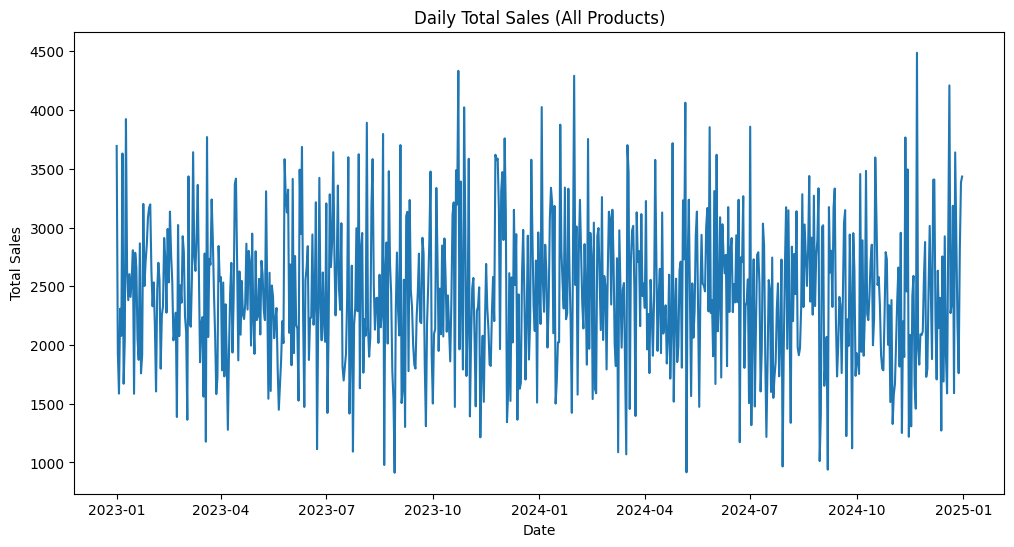

In [76]:
# Aggregate sales across all products by date
df_agg = df.groupby('Date')['Sales'].sum()

# Plot the aggregated sales data
plt.figure(figsize=(12, 6))
plt.plot(df_agg)
plt.title('Daily Total Sales (All Products)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

**Check for Stationarity**

In [77]:
# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(df_agg.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])



ADF Statistic: -28.230740290367752
p-value: 0.0


**Testing For Stationarity**

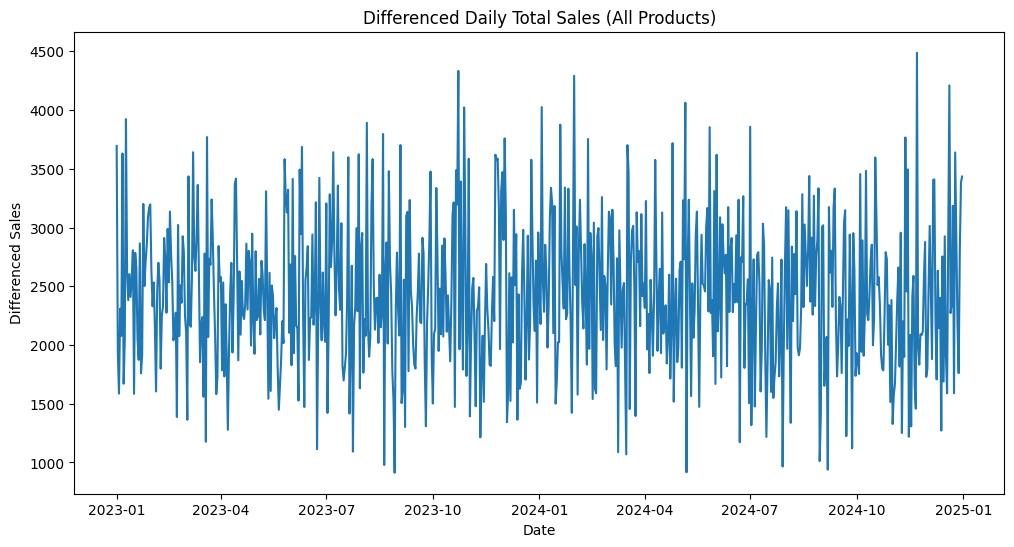

In [78]:
# Apply differencing if the data is not stationary
if result[1] > 0.05:  # If the data is not stationary (p-value > 0.05)
    df_agg_diff = df_agg.diff().dropna()
else:
    df_agg_diff = df_agg

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(df_agg_diff)
plt.title('Differenced Daily Total Sales (All Products)')
plt.xlabel('Date')
plt.ylabel('Differenced Sales')
plt.show()



**Appying Differencing to Non-Stationary data**

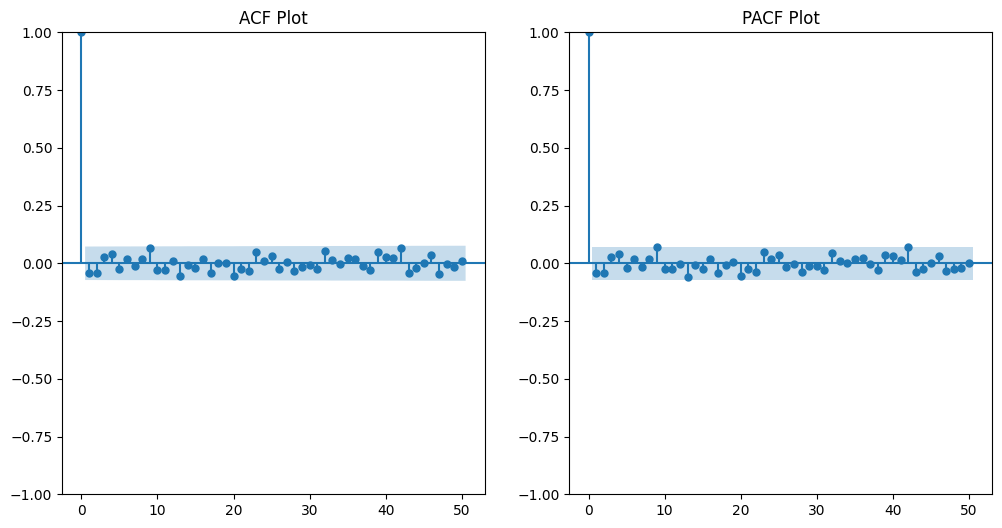

In [79]:
# Plot ACF and PACF to determine ARIMA parameters
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df_agg_diff, lags=50, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df_agg_diff, lags=50, ax=plt.gca())
plt.title('PACF Plot')

plt.show()

**Determine ARIMA Parameters**

In [80]:
# Build and fit the ARIMA model
# Adjust the parameters (p, d, q) based on ACF and PACF analysis
p, d, q = 1, 1, 1  # Example values; modify based on your ACF and PACF plots
model = ARIMA(df_agg, order=(p, d, q))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  731
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5744.448
Date:                Sun, 15 Sep 2024   AIC                          11494.897
Time:                        18:57:54   BIC                          11508.676
Sample:                    01-01-2023   HQIC                         11500.213
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.036     -1.204      0.228      -0.115       0.028
ma.L1         -0.9999      0.220     -4.537      0.000      -1.432      -0.568
sigma2      3.977e+05   9.31e+04      4.274      0.0

 **Fit the ARIMA**

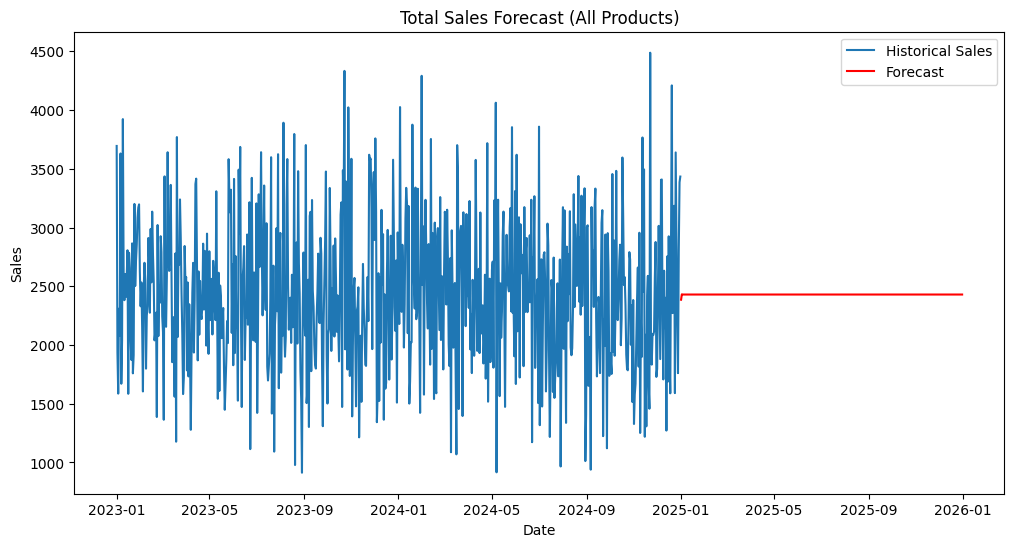

2025-01-01    2385.381576
2025-01-02    2431.438108
2025-01-03    2429.415196
2025-01-04    2429.504047
2025-01-05    2429.500145
                 ...     
2025-12-27    2429.500309
2025-12-28    2429.500309
2025-12-29    2429.500309
2025-12-30    2429.500309
2025-12-31    2429.500309
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


In [81]:
# Forecast the next year (365 days)
forecast = model_fit.forecast(steps=365)

# Generate the date range for the forecast
forecast_dates = pd.date_range(start=df_agg.index[-1] + pd.Timedelta(days=1), periods=365, freq='D')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_agg, label='Historical Sales')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Total Sales Forecast (All Products)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

print(forecast)

**Forecasting :**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  731
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5682.615
Date:                Sun, 15 Sep 2024   AIC                          11371.229
Time:                        18:25:36   BIC                          11385.008
Sample:                    01-01-2023   HQIC                         11376.545
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0214      0.035      0.613      0.540      -0.047       0.090
ma.L1         -1.0000      2.523     -0.396      0.692      -5.945       3.945
sigma2      3.343e+05   8.42e+05      0.397      0.6

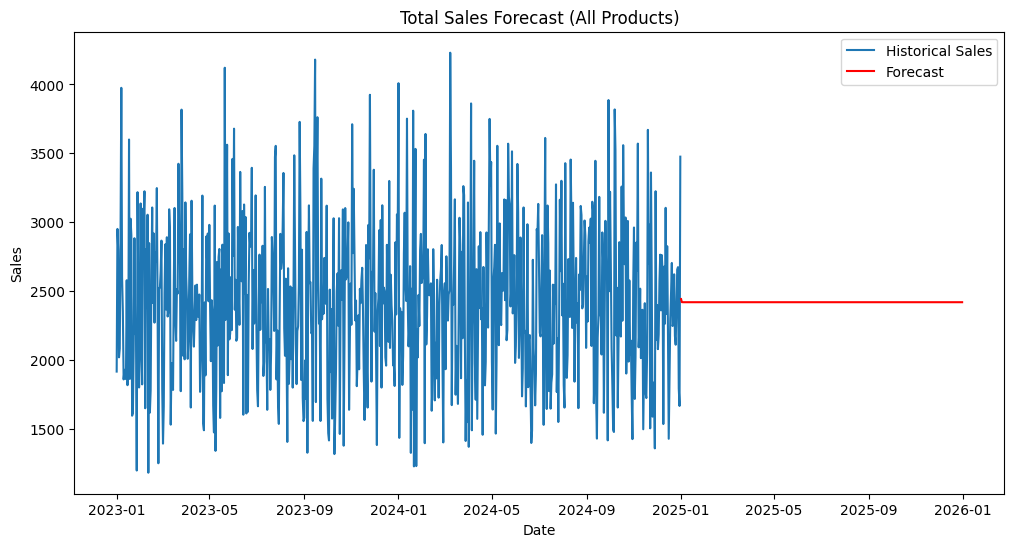

In [59]:
# Forecast the next year
from statsmodels.tsa.arima.model import ARIMA

# Build and fit the ARIMA model
p, d, q = 1, 1, 1  # Example values based on ACF/PACF analysis
model = ARIMA(df_agg, order=(p, d, q))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Forecast the next year (365 days)
forecast = model_fit.forecast(steps=365)

# Generate the date range for the forecast
forecast_dates = pd.date_range(start=df_agg.index[-1] + pd.Timedelta(days=1), periods=365, freq='D')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_agg, label='Historical Sales')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Total Sales Forecast (All Products)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



**Recommandations :**

Optimize Stock Levels: Use the sales forecast to plan your inventory levels more accurately. For days predicted to have lower sales, reduce the stock of perishable items to avoid spoilage. On days with higher sales projections, ensure that you have sufficient inventory to meet demand.

Prepare for Seasonal Sales Variations: Based on any visible seasonal patterns in the forecast, make sure to adjust inventory for high-demand periods, such as holidays or local events, to capitalize on potential sales spikes.

Maximize Revenue During High-Sales Periods: Conversely, for periods where sales are forecasted to be higher, you can experiment with slight price increases or premium product offerings to maximize profits without significantly impacting sales volume.

**Financial Forecasting:**

Project Revenue and Budgeting: The forecast can be used to project total revenue for the year ahead. Use this to plan the shop’s budget, forecast expenses, and ensure that cash flow is well-managed throughout the year.

Plan for Capital Investments: If the sales forecast shows steady growth, consider investing in areas like store upgrades, new product lines, or additional staff. If the forecast is flat, it may be better to focus on cost-saving measures and improving efficiency.